# Comparison of results quality from different Classification models

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

### Social network advertising data

In [24]:
data = pd.read_csv("Social_Network_Ads.csv")
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


#### Checking the data

In [25]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

#### Splitting & Scaling the data

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Creating Models

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver="liblinear", random_state=42, warm_start=True)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear', warm_start=True)

### KNN

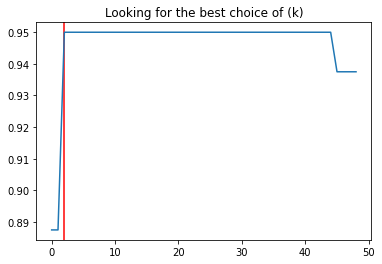

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_score = []
k_set = []

# Try many choices of (k)
for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    knn.fit(X_train, y_train)
    k_set.append(k)
    knn_score.append(accuracy_score(y_test, knn.predict(X_test)))

# Find the best value of (k)
best_k_idx = knn_score.index(max(knn_score))
best_k = k_set[best_k_idx]

# Train the model with the best choice of (k)
knn = KNeighborsClassifier(n_neighbors = best_k, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

# Plot k selection
plt.title("Looking for the best choice of (k)")
plt.axvline(best_k_idx, c="r")
plt.plot(knn_score)

### SVM

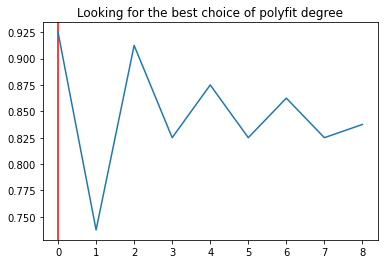

In [29]:
from sklearn.svm import SVC

svm_scores = []
degree_set = []

for degree in range(1, 10):
    svm = SVC(kernel = 'poly', degree=degree, random_state = 42)
    svm.fit(X_train, y_train)
    degree_set.append(degree)
    svm_scores.append(accuracy_score(y_test, svm.predict(X_test)))

# Find the best value of degree
best_degree_idx = svm_scores.index(max(svm_scores))
best_degree = degree_set[best_degree_idx]

# Train the model with the best degree choice
svm = SVC(kernel = 'poly', degree=best_degree, random_state = 42)
svm.fit(X_train, y_train)

# Plot Degree selection
plt.title("Looking for the best choice of polyfit degree")
plt.axvline(best_degree_idx, c="r")
plt.plot(svm_scores)

### Kernel SVM

In [30]:
from sklearn.svm import SVC

k_svm = SVC(kernel = 'rbf', random_state = 0)
k_svm.fit(X_train, y_train)

SVC(random_state=0)

### Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

### Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Random Forrest

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predictions

In [34]:
lr_pred = lr.predict(X_test)
knn_pred = knn.predict(X_test)
svm_pred = svm.predict(X_test)
k_svm_pred = k_svm.predict(X_test)
nb_pred = nb.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

### Confusion matrices for each model

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score

lr_cm = confusion_matrix(y_test, lr_pred)
lr_score = accuracy_score(y_test, lr_pred)

knn_cm = confusion_matrix(y_test, knn_pred)
knn_score = accuracy_score(y_test, knn_pred)

svm_cm = confusion_matrix(y_test, svm_pred)
svm_score = accuracy_score(y_test, svm_pred)

k_svm_cm = confusion_matrix(y_test, k_svm_pred)
k_svm_score = accuracy_score(y_test, k_svm_pred)

nb_cm = confusion_matrix(y_test, nb_pred)
nb_score = accuracy_score(y_test, nb_pred)

dt_cm = confusion_matrix(y_test, dt_pred)
dt_score = accuracy_score(y_test, dt_pred)

rf_cm = confusion_matrix(y_test, rf_pred)
rf_score = accuracy_score(y_test, rf_pred)

models = ['Linear Regr.', 'KNN', 'SVM', 'Kernel SVM', 'Naive Bayes', 'Decision Tree', 'Random Forrest']
scores = [lr_score, knn_score, svm_score, k_svm_score, nb_score, dt_score, rf_score]

maximum_score = max(scores)
maximum_idx = scores.index(maximum_score)

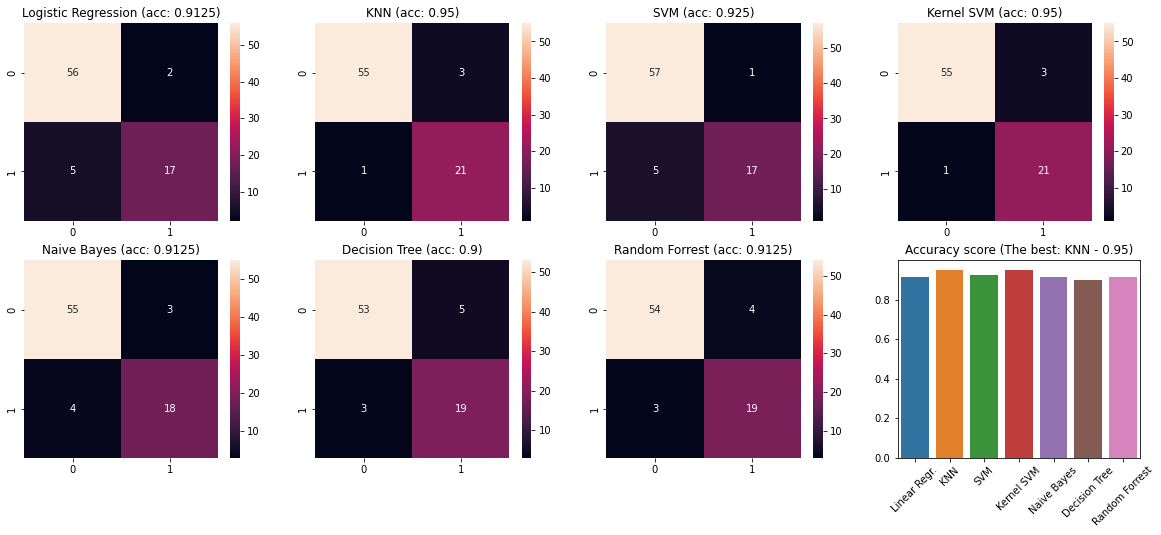

In [36]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(20, 8))


ax1.set_title(f"Logistic Regression (acc: {lr_score})")
sn.heatmap(ax=ax1, data=lr_cm, annot=True)

ax2.set_title(f"KNN (acc: {knn_score})")
sn.heatmap(ax=ax2, data=knn_cm, annot=True)

ax3.set_title(f"SVM (acc: {svm_score})")
sn.heatmap(ax=ax3, data=svm_cm, annot=True)

ax4.set_title(f"Kernel SVM (acc: {k_svm_score})")
sn.heatmap(ax=ax4, data=k_svm_cm, annot=True)

ax5.set_title(f"Naive Bayes (acc: {nb_score})")
sn.heatmap(ax=ax5, data=nb_cm, annot=True)

ax6.set_title(f"Decision Tree (acc: {dt_score})")
sn.heatmap(ax=ax6, data=dt_cm, annot=True)

ax7.set_title(f"Random Forrest (acc: {rf_score})")
sn.heatmap(ax=ax7, data=rf_cm, annot=True)

ax8.set_title(f"Accuracy score (The best: {models[maximum_idx]} - {maximum_score})")
sn.barplot(
    ax=ax8, 
    x=models, 
    y=scores
    )
ax8.tick_params(axis="x", rotation=45)
